### Chipotle Orders Analysis

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
ordersDF = pd.read_table("./data/chipotle.tsv")

In [3]:
ordersDF.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
ordersDF["choice_description"] = ordersDF.apply(lambda x: re.sub(r"[\[\]]", '', str(x.choice_description)), axis=1)
ordersDF["choice_description"] = ordersDF.apply(lambda x: x.choice_description.split(", "), axis=1)
ordersDF["item_name"] = ordersDF.apply(lambda x: [x.item_name], axis=1)
ordersDF["price"] = pd.to_numeric(ordersDF.item_price.str.replace("$", ""), downcast="float", errors="coerce")

In [5]:
ordersDF.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price             object
price                 float32
dtype: object

In [6]:
ordersDF.head()

,order_id,quantity,item_name,choice_description,item_price,price
0,1,1,[Chips and Fresh Tomato Salsa],[nan],$2.39,2.39
1,1,1,[Izze],[Clementine],$3.39,3.39
2,1,1,[Nantucket Nectar],[Apple],$3.39,3.39
3,1,1,[Chips and Tomatillo-Green Chili Salsa],[nan],$2.39,2.39
4,2,2,[Chicken Bowl],"[Tomatillo-Red Chili Salsa (Hot), Black Beans,...",$16.98,16.98


In [7]:
orderIdTable = ordersDF.groupby(by="order_id", as_index=False)[["quantity", "price"]].sum()

In [8]:
orderIdTable.head()

,order_id,quantity,price
0,1,4,11.56
1,2,2,16.98
2,3,2,12.67
3,4,2,21.00
4,5,2,13.70


In [9]:
orderIdTable.tail()

,order_id,quantity,price
1829,1830,2,23.00
1830,1831,3,12.90
1831,1832,2,13.20
1832,1833,2,23.50
1833,1834,3,28.75


In [10]:
rows, cols = orderIdTable.shape
print(f"Orders ID table has {rows} rows and {cols} columns")

Orders ID table has 1834 rows and 3 columns


In [11]:
print(f"Price made per order on {rows} orders is ${orderIdTable["price"].mean():.2f}")

Price made per order on 1834 orders is $18.81


In [12]:
print(f"Each customer ordered atleast {orderIdTable["quantity"].mean():.0f} items per order on an average")

Each customer ordered atleast 3 items per order on an average


In [13]:
ordersDfModified = ordersDF.groupby(by="order_id", as_index=False).sum()

In [14]:
ordersDfModified.head()

,order_id,quantity,item_name,choice_description,item_price,price
0,1,4,"[Chips and Fresh Tomato Salsa, Izze, Nantucket...","[nan, Clementine, Apple, nan]",$2.39 $3.39 $3.39 $2.39,11.56
1,2,2,[Chicken Bowl],"[Tomatillo-Red Chili Salsa (Hot), Black Beans,...",$16.98,16.98
2,3,2,"[Chicken Bowl, Side of Chips]","[Fresh Tomato Salsa (Mild), Rice, Cheese, Sour...",$10.98 $1.69,12.67
3,4,2,"[Steak Burrito, Steak Soft Tacos]","[Tomatillo Red Chili Salsa, Fajita Vegetables,...",$11.75 $9.25,21.00
4,5,2,"[Steak Burrito, Chips and Guacamole]","[Fresh Tomato Salsa, Rice, Black Beans, Pinto ...",$9.25 $4.45,13.70


In [15]:
ordersDfModified.tail()

,order_id,quantity,item_name,choice_description,item_price,price
1829,1830,2,"[Steak Burrito, Veggie Burrito]","[Fresh Tomato Salsa, Rice, Sour Cream, Cheese,...",$11.75 $11.25,23.00
1830,1831,3,"[Carnitas Bowl, Chips, Bottled Water]","[Fresh Tomato Salsa, Fajita Vegetables, Rice, ...",$9.25 $2.15 $1.50,12.90
1831,1832,2,"[Chicken Soft Tacos, Chips and Guacamole]","[Fresh Tomato Salsa, Rice, Cheese, Sour Cream,...",$8.75 $4.45,13.20
1832,1833,2,"[Steak Burrito, Steak Burrito]","[Fresh Tomato Salsa, Rice, Black Beans, Sour C...",$11.75 $11.75,23.50
1833,1834,3,"[Chicken Salad Bowl, Chicken Salad Bowl, Chick...","[Fresh Tomato Salsa, Fajita Vegetables, Pinto ...",$11.25 $8.75 $8.75,28.75


In [16]:
print(f"{ordersDfModified.quantity.sum()} items were placed in {rows} orders")

4972 items were placed in 1834 orders


In [17]:
ordersDict ={}

for items in ordersDfModified.item_name:

    for item in items:

        if item in ordersDict.keys():

            ordersDict[item] += 1
        
        else:

            ordersDict.setdefault(item, 1)


In [18]:
foodItem = []
numOfOrders = []

for key, val in ordersDict.items():
    foodItem.append(key)
    numOfOrders.append(val)

In [19]:
foodSold = pd.DataFrame(data = {"food_item":np.array(foodItem), "num_of_orders":np.array(numOfOrders)})
foodSold = foodSold.sort_values(by="num_of_orders", ascending=False, ignore_index=True)

In [20]:
print("Top 5 Items Sold")
foodSold.head()

Top 5 Items Sold


,food_item,num_of_orders
0,Chicken Bowl,726
1,Chicken Burrito,553
2,Chips and Guacamole,479
3,Steak Burrito,368
4,Canned Soft Drink,301


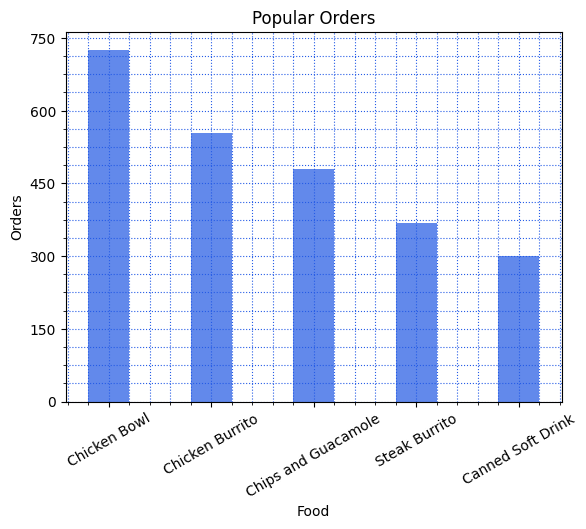

In [36]:
plt.bar(foodSold.head().food_item, foodSold.head().num_of_orders, width=0.4, color="#6289eb")
plt.title("Popular Orders")
plt.xlabel("Food")
plt.xticks(rotation=30)
plt.yticks(np.arange(0, 800, 150))
plt.minorticks_on()
plt.ylabel("Orders")
plt.grid(linestyle=":", color="#255ce7", which="both")

In [ ]:
popularOrder = {"Chicken":0, "Steak":0, "Chips":0}

def extraction(x):

    if "Chicken" in x.food_item:
        popularOrder["Chicken"] += x.num_of_orders
    elif "Steak" in x.food_item:
        popularOrder["Steak"] += x.num_of_orders
    elif "Chips" in x.food_item:
        popularOrder["Chips"] += x.num_of_orders
        

foodSold.apply(extraction, axis=1)

popularOrder

In [ ]:
popularDf = pd.DataFrame(data={"foodSold":list(popularOrder), "numberSold":list(popularOrder.values())})
popularDf

In [ ]:
plt.bar(popularDf.foodSold, popularDf.numberSold, width=0.4)
plt.title("Popular Main")
plt.xlabel("Food")
plt.ylabel("Orders")

In [ ]:
# orderIdTable.to_csv("./data/ordersTable.tsv", sep="	", index=False)
# foodSold.to_csv("./data/foodSold.tsv", sep="	", index=False)